# Putting it all together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('data2/gapminder.csv')

### 1. Exploratory Data Analysis(EDA)

Your first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

Use Pandas methods such a `head()`, `info()`, etc.

In [2]:
df.columns

Index(['Unnamed: 0', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=219)

In [3]:
df.shape

(780, 219)

In [4]:
df.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# fix the dataset
g1800s = df[['Life expectancy', '1800','1801','1802','1803','1804','1805','1806','1807','1808','1809','1810','1811','1812','1813','1814','1815','1816','1817','1818','1819','1820','1821','1822','1823','1824','1825','1826','1827','1828','1829','1830','1831','1832','1833','1834','1835','1836','1837','1838','1839','1840','1841','1842','1843','1844','1845','1846','1847','1848','1849','1850','1851','1852','1853','1854','1855','1856','1857','1858','1859','1860','1861','1862','1863','1864','1865','1866','1867','1868','1869','1870','1871','1872','1873','1874','1875','1876','1877','1878','1879','1880','1881','1882','1883','1884','1885','1886','1887','1888','1889','1890','1891','1892','1893','1894','1895','1896','1897','1898','1899']]
print('Shape', g1800s.shape)
g1800s.info()

Shape (780, 101)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 615.5+ KB


In [7]:
# remove duplicate rows
g1800s = g1800s[:260]
g1800s.shape

(260, 101)

### 2. Visualizing your data

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

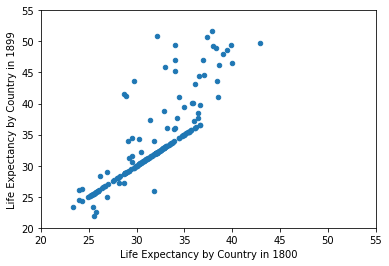

In [8]:
# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

### 3. Testing your data

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

-` 'Life expectancy'` is the first column (index `0`) of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to 0.
- There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

Define a function called check_null_or_valid() that takes in one argument: `row_data`. Inside the function, convert `no_na` to a numeric data type using `pd.to_numeric()`.  

In [9]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

Write an `assert` statement to make sure the first column (index `0`) of the DataFrame is `Life expectancy`

In [10]:
# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

Write an `assert` statement to test that all the values are valid for the g1800s DataFrame. Use the `check_null_or_valid()` function placed inside the `.apply()` method for this. Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the `.all()` method twice.

In [11]:
# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

Write an `assert` statement to make sure that each **country occurs only once** in the data. Use the `.value_counts()` method on the `Life expectancy` column for this. Specifically, index `0` of `.value_counts()` will contain the most frequently occuring value. If this is equal to `1` for the `Life expectancy` column, then you can be certain that no country appears more than once in the data.

In [13]:
# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

### 4. Assembling your data

The g1800s, g1900s, and g2000s dataframes contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to **concatenate** them into a single DataFrame called gapminder. This is a row-wise concatenation.

```py
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s])

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())
```
![screenshot](img/screenshot-1.png)

In [17]:
# prepare the dataset
gapminder = pd.read_csv('data2/gapminder.csv')
gapminder = gapminder.drop(['Unnamed: 0'], axis=1) # match exercise
print(gapminder.shape)
gapminder.head()

(780, 218)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


### 5. Tidy Data Principles - Reshape Data

Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it. Keep `Life expectancy` fixed by specifying it as an argument to the `id_vars` parameter.

In [19]:
gapminder_melt = pd.melt(frame=gapminder, id_vars=['Life expectancy'])
print(gapminder_melt.shape)
print(gapminder_melt.columns)
gapminder_melt.info()

(169260, 3)
Index(['Life expectancy', 'variable', 'value'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
Life expectancy    169260 non-null object
variable           169260 non-null object
value              43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


Rename the three columns of the melted DataFrame to `country`, `year`, and `life_expectancy` by passing them in as a list to `gapminder_melt.columns`

In [20]:
# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']
print(gapminder_melt.shape)
print(gapminder_melt.columns)
gapminder_melt.info()

(169260, 3)
Index(['country', 'year', 'life_expectancy'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


### 6. Tidy Data Principles - Checking data types

Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type `object`, year is of type `int64`, and life_expectancy is of type `float64`.

We'll convert the `year` column of `gapminder` using `pd.to_numeric()`.

In [21]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt['year'], errors='coerce')

`Assert` that the `country` column is of type `np.object`.

In [23]:
assert gapminder_melt.country.dtypes == np.object

`Assert` that the `year` column is of type `np.int64`.

In [24]:
assert gapminder_melt.year.dtypes == np.int64

`Assert` that the `life_expectancy` column is of type `np.float64`.

In [25]:
assert gapminder_melt.life_expectancy.dtypes == np.float64

Since the assert statements did not throw any errors, you can be sure that your columns have the correct data types!

### 7. Tidy Data Principles - Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the `country` column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

- The set of lower and upper case letters.
- Whitespace between words.
- Periods for any abbreviations.
- To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - `str.contains()` - which takes a regular expression pattern, and applies it to the Series, returning `True` if there is a match, and `False` otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using `~`. This Boolean series can then be used to get the Series of countries that have invalid names.

Create a Series called countries consisting of the 'country' column of gapminder_melt  and drop all duplicate rows.

In [28]:
countries = gapminder_melt['country']
countries = countries.drop_duplicates()

Write a regular expression that tests your assumptions of what characters belong in countries:

- Anchor the pattern to match exactly what you want by placing a `^` in the beginning and `$` in the end.
- Use `A-Za-z` to match the set of lower and upper case letters, `\.` to match periods, and `\s` to match whitespace between words.

In [29]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

Use `str.contains()` to create a Boolean vector representing values that match the pattern.

In [30]:
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

Invert the mask by placing a `~` before it.

In [31]:
# Invert the mask: mask_inverse
mask_inverse = ~mask

Subset the countries series using the `.loc[]` accessor and `mask_inverse`. Print the invalid country names!

In [32]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187            St. BarthÃ©lemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                     Ã…land
Name: country, dtype: object


 As you can see, not all these country names are actually invalid so maybe the assumptions need to be tweaked a little. However, there certainly are a few cases worth further investigation, such as 'St. Barth?lemy'. Whenever you are dealing with columns of raw data consisting of strings, it is important to check them for consistency like this.

### 8. Tidy Data Principles - Dealing with Missing Data

There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a `forward fill` or `backward fill`, in which you replace missing values in a column with the most recent known value in the column.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have `NaN` in the `life_expectancy` column. Before doing so, it would be valuable to use `assert` statements to confirm that `year` and `country` do not have any missing values.

In [33]:
gapminder_melt.shape

(169260, 3)

`Assert` that `country` and `year` do not contain any missing values. Note the chaining of the `.all()` method to `pd.notnull()` to confirm that all values in the column are not null.

In [34]:
assert pd.notnull(gapminder_melt.country).all()

In [36]:
assert pd.notnull(gapminder_melt.year).all()

Drop the rows in the data where any observation in `life_expectancy` is missing. As you confirmed that `country` and `year` don't have missing values, you can use the `.dropna()` method on the entire gapminder DataFrame, because any missing values would have to be in the `life_expectancy` column. The `.dropna()` method has the default keyword arguments `axis=0` and `how='any'`, which specify that rows with any missing values should be dropped.

In [38]:
gapminder_melt = gapminder_melt.dropna()
gapminder_melt.shape

(43857, 3)

After dropping the missing values from `life_expectancy`, the number of rows in the DataFrame has gone down from `169260` to `43857`. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.

### 9. Tidy Data Principles - visualization and aggregation

Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. Begin by creating a `histogram` of the `life_expectancy` column. You should not get any values under `0` and you should see something reasonable on the higher end of the `life_expectancy` age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each `year`, get the `life_expectancy` column from each subset, and take an average of the values. You can achieve this using the pandas `.groupby()` method.

Finally, you can save your tidy and summarized DataFrame to a file using the `.to_csv()` method.

Create a histogram of the `life_expectancy` column using the `.plot()` method of gapminder. Specify `kind='hist'`.

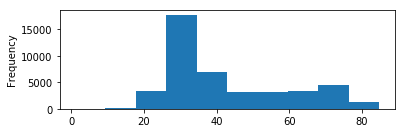

In [53]:
plt.subplot(2, 1, 1)
gapminder_melt.life_expectancy.plot(kind='hist');

Group gapminder by `year` and aggregate `life_expectancy` by the mean. To do this:
Use the `.groupby()` method on gapminder with `year` as the argument. Then select `life_expectancy` and chain the `.mean()` method to it.

In [43]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

In [44]:
gapminder_agg.tail()

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64

Create a line plot of average life expectancy per year by using the `.plot()` method (without any arguments in plot) on `gapminder_agg`.

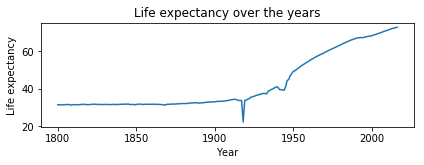

In [50]:
# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot();

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [51]:
# save the dataframes to csv
gapminder_melt.to_csv('data2/gapminder_melt.csv')
gapminder_agg.to_csv('data2/gapminder_agg.csv')